In [313]:
from google.colab import files
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [314]:
uploaded = files.upload()
#datasetpúblico - Dataset_publico.csv

Saving Dataset_publico.csv to Dataset_publico (6).csv


In [315]:
uploaded = files.upload()
#basedeteste - x(1).csv

Saving X(1).csv to X(1) (5).csv


In [316]:
dados=pd.read_csv("Dataset_publico.csv",sep=";")
teste=pd.read_csv("X(1).csv",sep=";")

In [317]:
def hr_func(ts):
    return ts.hour
def day_func(ts):
    return ts.day
def week_func(ts):
    return ts.strftime('%A')
def diadoano_func(ts):
    return ts.strftime('%m-%d-%Y')
def  fora_do_tempo(dados):
  if dados["Diferençamin"]<=15:
    return 0
  else:
    return 100
def horaatendimento(ts):
    if ts.hour <=10:
      return 10
    elif ts.hour >= 14:
      return 14
    else:
      return ts.hour 
def str_func(x):
    return str(x)
def float_func(x):
    return float(x)
def hora_min_seg_func2(ts):
    return ts.strftime('%H:59:59')
def iniciomes(x):
  if x<11:
    return 1
  else:
    return 0
def hora_min_seg_func(ts):
    return ts.strftime('%H:%M:%S')
def correcao(x):
  if x <0:
    return 0
  else:
    return x
def rmse(a, b):
    return np.sqrt(((a - b) ** 2).mean())

In [318]:
dados["TS_INC_EPR"]=pd.to_datetime(dados["TS_INC_EPR"])
dados["TS_INC_CHMD"]=pd.to_datetime(dados["TS_INC_CHMD"])
dados.rename(columns={'TS_INC_EPR': 'Início'},inplace=True)
dados.rename(columns={'TS_INC_CHMD': 'Fim'},inplace=True)
dados["Diferença"]=(dados['Fim'] - dados['Início'])
dados["Diferençamin"]=(((dados['Fim'] - dados['Início']).dt.seconds)/60).round(3)

In [319]:
dados["Hora"]=dados['Início'].apply(hr_func)
dados["Dia"]=dados['Início'].apply(day_func)
dados["Diadasemana"]=dados['Início'].apply(week_func)
dados["fora_do_tempo"]=dados.apply(fora_do_tempo,axis=1)

In [320]:
filtro3=dados["ID_UOR"]==3

In [321]:
dados[filtro3]

,ID,ID_UOR,Início,Fim,Diferença,Diferençamin,Hora,Dia,Diadasemana,fora_do_tempo
56201,63640,3,2020-09-04 11:19:59,NaT,NaT,NaN,11,4,Friday,100
56202,63641,3,2020-09-11 14:09:53,NaT,NaT,NaN,14,11,Friday,100
56203,63642,3,2020-09-17 12:52:41,NaT,NaT,NaN,12,17,Thursday,100
56204,63643,3,2020-09-21 11:19:41,NaT,NaT,NaN,11,21,Monday,100


In [322]:
dados.dropna(subset=['Diferença'], inplace=True)

In [323]:
dados.groupby(["ID_UOR"])["Diferençamin"].describe()

,count,mean,std,min,25%,50%,75%,max
ID_UOR,,,,,,,,
0,17710.0,4.055378,4.927178,0.017,0.050,2.250,6.36700,45.317
1,24312.0,9.170049,6.558210,0.083,4.100,8.100,13.00000,64.067
2,14158.0,0.688996,3.123575,0.017,0.033,0.050,0.11700,105.117
4,17652.0,7.337077,5.899947,0.000,2.917,5.950,10.25000,60.567
5,19287.0,6.449121,9.915461,0.000,0.100,2.150,9.06700,263.950
6,15631.0,7.779987,7.357876,0.000,2.400,5.400,10.88300,243.700
7,637.0,0.441827,2.619521,0.050,0.083,0.100,0.13300,46.600
8,48760.0,9.567835,11.252228,0.000,2.900,5.817,11.91700,235.133
9,15346.0,5.554309,4.626955,0.017,2.150,4.267,7.51275,76.033


In [324]:
dados.groupby(["Diadasemana"])["Diferençamin"].describe()

,count,mean,std,min,25%,50%,75%,max
Diadasemana,,,,,,,,
Friday,68203.0,5.601307,7.678145,0.0,0.133,2.967,8.1585,192.417
Monday,65682.0,5.457507,7.450766,0.0,0.133,2.783,7.8330,243.700
Thursday,66360.0,5.577516,7.568148,0.0,0.150,2.967,8.0670,115.433
Tuesday,68954.0,5.246278,8.252122,0.0,0.133,2.667,7.3830,266.683
Wednesday,66229.0,5.181487,7.395323,0.0,0.133,2.633,7.3830,269.333


In [325]:
dados.groupby(["Hora"])["Diferençamin"].describe()

,count,mean,std,min,25%,50%,75%,max
Hora,,,,,,,,
7,1.0,0.917000,NaN,0.917,0.91700,0.917,0.91700,0.917
8,12.0,9.825083,8.124261,0.083,2.02525,11.117,16.67075,20.667
9,3700.0,7.604105,6.698372,0.017,1.78300,6.200,11.95000,52.050
10,54676.0,4.994876,6.192479,0.000,0.15000,2.983,7.70000,269.333
11,74907.0,5.535857,7.946477,0.000,0.18300,3.067,8.13300,266.683
12,64149.0,5.534679,7.561803,0.000,0.13300,2.867,7.91700,177.300
13,69343.0,5.582339,7.901171,0.000,0.13300,2.817,7.93300,123.200
14,41427.0,5.122527,8.242368,0.000,0.10000,2.200,6.80000,126.900
15,25144.0,5.580140,8.596812,0.000,0.16700,2.533,7.18300,105.117


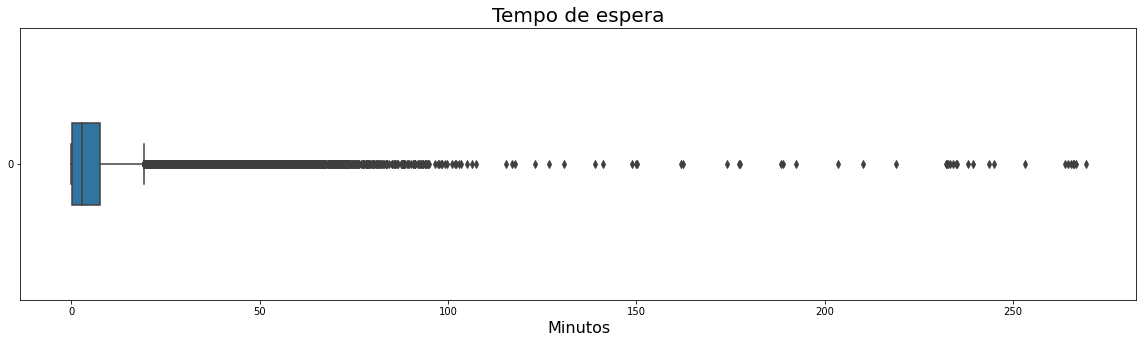

In [326]:
ax = sns.boxplot(data=dados["Diferençamin"], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Tempo de espera', fontsize=20)
ax.set_xlabel('Minutos', fontsize=16)
ax

In [327]:
dados["Diferençamin"].describe()

count    335428.000000
mean          5.412567
std           7.682121
min           0.000000
25%           0.133000
50%           2.800000
75%           7.767000
max         269.333000
Name: Diferençamin, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


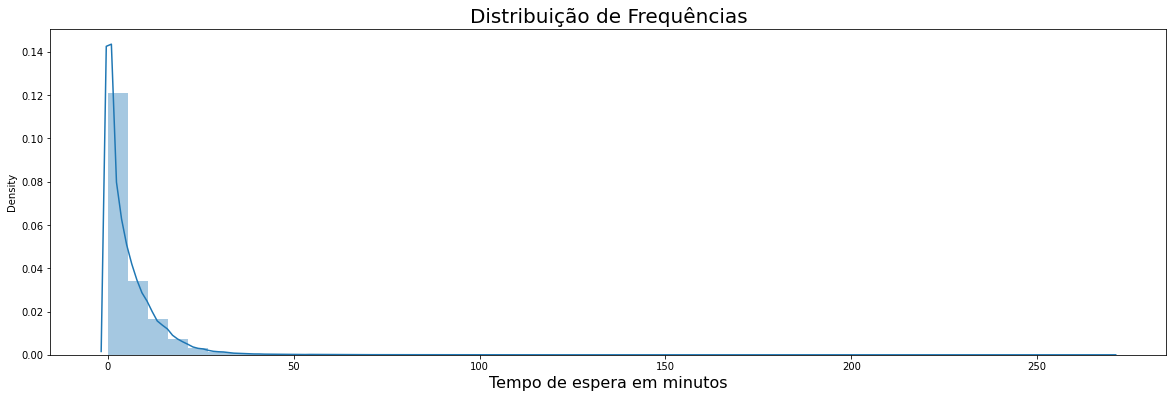

In [328]:
ax = sns.distplot(dados['Diferençamin'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Tempo de espera em minutos', fontsize=16)
ax


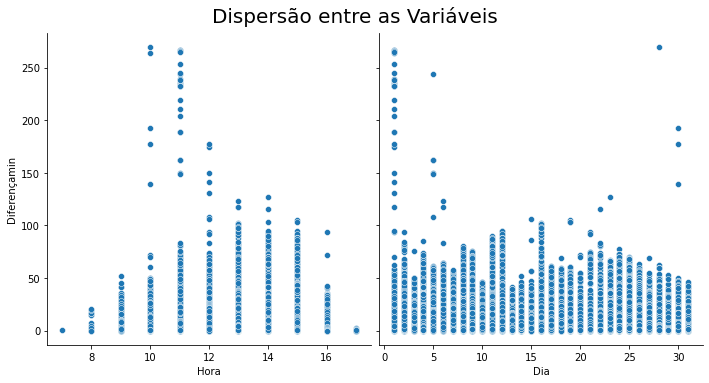

In [329]:
ax = sns.pairplot(dados, y_vars='Diferençamin', x_vars=['Hora', 'Dia'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [330]:
#copiadados=dados
#copiadados['Diadoano']=copiadados['Início'].apply(diadoano_func)
#copiadados.drop_duplicates(["Diadoano"],inplace=True)
#copiadados["Diadasemana"].value_counts()
#dados['Diadoano']=copiadados['Início'].apply(diadoano_func)
#dados.groupby(["Diadoano"])["Diferençamin"].mean()
#dadosdias=pd.DataFrame(data=dados.groupby(["Diadoano"])["Diferençamin"].mean())
#dadosdias.plot()

In [331]:
dados["Horaatendimento"]=dados['Início'].apply(horaatendimento)
dados["Diadoano"]=dados['Início'].apply(diadoano_func)
dados["Diadoano"]=pd.to_datetime(dados["Diadoano"])

In [332]:
dadosemgrupo=dados.groupby(["ID_UOR","Diadoano","Horaatendimento"]).mean()

In [333]:
dadosemgrupo

ID  Diferençamin  ...   Dia  fora_do_tempo
ID_UOR Diadoano   Horaatendimento                          ...                     
0      2020-09-01 10                    5.5      4.555583  ...   1.0       8.333333
       2020-09-02 10                   23.0      0.037652  ...   2.0       0.000000
                  11                   39.5      3.318300  ...   2.0       0.000000
                  12                   51.5      0.571357  ...   2.0       0.000000
                  13                   66.5      0.685500  ...   2.0       0.000000
...                                     ...           ...  ...   ...            ...
24     2021-07-29 13               376658.5      0.487500  ...  29.0       0.000000
       2021-07-30 10               376662.5      1.416500  ...  30.0       0.000000
                  11               376668.0      4.216714  ...  30.0       0.000000
                  12               376674.0      2.670000  ...  30.0       0.000000
                  13               376679.0      1.826400  ...  30.0       0.000000

[20839 rows x 5 columns]

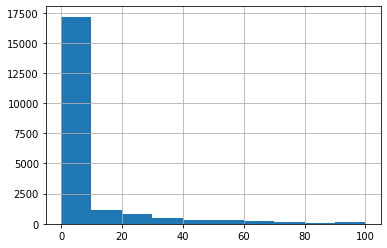

In [334]:
dadosemgrupo["fora_do_tempo"].hist()

In [335]:
dadosemgrupo=dadosemgrupo.reset_index()

In [336]:
dadosemgrupo.drop(columns=['Hora',"Dia","ID","Diferençamin"],inplace=True)

In [337]:
dadosemgrupo.rename(columns={'Diadoano': 'DT'},inplace=True)
dadosemgrupo.rename(columns={'fora_do_tempo': 'PC_ACI_PZ'},inplace=True)


In [338]:
dadosemgrupo["HH_INC"]=pd.to_datetime(dadosemgrupo["Horaatendimento"], format='%H')
dadosemgrupo["HH_FIM"]=dadosemgrupo["HH_INC"].apply(hora_min_seg_func2)
dadosemgrupo["HH_INC"]=dadosemgrupo["HH_INC"].apply(hora_min_seg_func)


In [339]:
dadosemgrupo.drop(columns=["Horaatendimento"],inplace=True)

In [340]:
dadosemgrupo = dadosemgrupo.reindex(columns=['ID_UOR','DT','HH_INC','HH_FIM','PC_ACI_PZ'])

In [341]:
dadosemgrupo.rename_axis('ID',inplace=True)

In [342]:
#dadosemgrupo.to_csv("Dados_por_hora.csv")

In [343]:
teste["HH_INC"]=pd.to_datetime(teste["HH_INC"])
dadosemgrupo["HH_INC"]=pd.to_datetime(dadosemgrupo["HH_INC"])
teste["DT"]=pd.to_datetime(teste["DT"])
dadosemgrupo["DT"]=pd.to_datetime(dadosemgrupo["DT"])
teste["Hora"]=teste['HH_INC'].apply(hr_func)
dadosemgrupo["Hora"]=dadosemgrupo['HH_INC'].apply(hr_func)
teste["Dia"]=teste['DT'].apply(day_func)
dadosemgrupo["Dia"]=dadosemgrupo['DT'].apply(day_func)
teste["Diadasemana"]=teste['DT'].apply(week_func)
dadosemgrupo["Diadasemana"]=dadosemgrupo['DT'].apply(week_func)

In [344]:
dadosemgrupo["Hora"]=dadosemgrupo['Hora'].apply(str)
dadosemgrupo["ID_UOR"]=dadosemgrupo['ID_UOR'].apply(str)
dadosemgrupo["Dia"]=dadosemgrupo['Dia'].apply(float_func)
teste["Hora"]=teste['Hora'].apply(str)
teste["ID_UOR"]=teste['ID_UOR'].apply(str)
teste["Dia"]=teste['Dia'].apply(float_func)

In [345]:
dados.groupby("ID_UOR").mean()

,ID,Diferençamin,Hora,Dia,fora_do_tempo,Horaatendimento
ID_UOR,,,,,,
0,8855.253755,4.055378,11.776172,14.707171,3.918690,11.764370
1,31863.491650,9.170049,11.438549,14.908605,17.789569,11.514684
2,54203.494491,0.688996,11.779135,15.278288,0.988840,11.778076
4,72472.264049,7.337077,11.599592,15.273057,10.338772,11.620270
5,93010.504692,6.449121,12.587598,15.275678,14.973817,12.403951
6,112998.793551,7.779987,12.340925,15.059497,15.482055,12.218348
7,123487.000000,0.441827,11.689168,16.439560,0.627943,11.689168
8,148783.188495,9.567835,12.595837,15.523318,18.671042,12.442822
9,185030.803336,5.554309,11.529845,15.286915,4.711325,11.555845


In [346]:
teste["iniciomes"]=teste['Dia'].apply(iniciomes)

In [347]:
dadosemgrupo["iniciomes"]=dadosemgrupo['Dia'].apply(iniciomes)

In [348]:
dadosemgrupo.drop(columns=['DT',"HH_INC","HH_FIM","Dia"],inplace=True)

In [349]:
teste.drop(columns=['DT',"HH_INC","HH_FIM","Dia"],inplace=True)

In [377]:
teste2=pd.get_dummies(teste)

In [351]:
dadosemgrupo2=pd.get_dummies(dadosemgrupo)

In [352]:
dadosemgrupo2.corr()

,PC_ACI_PZ,iniciomes,ID_UOR_0,ID_UOR_1,ID_UOR_10,ID_UOR_11,ID_UOR_12,ID_UOR_13,ID_UOR_14,ID_UOR_15,ID_UOR_16,ID_UOR_17,ID_UOR_18,ID_UOR_19,ID_UOR_2,ID_UOR_20,ID_UOR_21,ID_UOR_22,ID_UOR_23,ID_UOR_24,ID_UOR_4,ID_UOR_5,ID_UOR_6,ID_UOR_7,ID_UOR_8,ID_UOR_9,Hora_10,Hora_11,Hora_12,Hora_13,Hora_14,Diadasemana_Friday,Diadasemana_Monday,Diadasemana_Thursday,Diadasemana_Tuesday,Diadasemana_Wednesday
PC_ACI_PZ,1.000000,0.094105,-0.040498,0.110232,-0.067694,-0.025512,-0.081763,-0.054386,-0.021221,0.048914,-0.054807,-0.008826,-0.082368,0.133768,-0.068726,-0.060376,-0.025579,-0.027370,-0.089684,-0.018729,0.050767,0.094599,0.101312,-0.025368,0.191546,-0.036940,-0.030726,0.013687,0.013012,0.012283,-0.011616,0.013728,0.026176,-0.013028,-0.007346,-0.018632
iniciomes,0.094105,1.000000,0.000040,-0.001342,0.006380,0.010397,0.001745,0.013786,0.021578,-0.002621,-0.015338,0.012449,-0.001784,-0.001782,0.005235,0.011196,-0.005255,-0.005886,-0.004887,-0.000636,-0.008235,-0.000336,-0.006733,-0.008743,0.003357,-0.006468,-0.005502,-0.002897,-0.002158,-0.000737,0.011135,-0.044919,-0.026495,0.031576,0.030210,0.008277
ID_UOR_0,-0.040498,0.000040,1.000000,-0.055938,-0.049591,-0.049948,-0.052729,-0.035539,-0.041167,-0.052302,-0.043555,-0.005212,-0.056262,-0.052927,-0.055586,-0.041481,-0.054903,-0.056181,-0.055504,-0.053825,-0.055694,-0.053096,-0.051815,-0.018254,-0.052615,-0.055122,0.024725,-0.006979,-0.006569,-0.007496,-0.001335,0.002331,0.000785,0.000192,-0.001236,-0.002002
ID_UOR_1,0.110232,-0.001342,-0.055938,1.000000,-0.049025,-0.049378,-0.052127,-0.035134,-0.040697,-0.051705,-0.043058,-0.005153,-0.055619,-0.052323,-0.054951,-0.041008,-0.054277,-0.055540,-0.054871,-0.053211,-0.055059,-0.052490,-0.051224,-0.018046,-0.052015,-0.054493,0.026688,-0.004357,-0.003949,-0.004872,-0.011310,0.002736,0.002203,-0.001522,-0.001262,-0.002053
ID_UOR_10,-0.067694,0.006380,-0.049591,-0.049025,1.000000,-0.043776,-0.046213,-0.031147,-0.036080,-0.045839,-0.038173,-0.004568,-0.049309,-0.046386,-0.048717,-0.036355,-0.048119,-0.049238,-0.048645,-0.047173,-0.048812,-0.046535,-0.045412,-0.015998,-0.046113,-0.048311,-0.044994,0.000330,0.004803,0.013908,0.022343,-0.000041,-0.002030,0.000035,0.001813,0.000159
ID_UOR_11,-0.025512,0.010397,-0.049948,-0.049378,-0.043776,1.000000,-0.046545,-0.031371,-0.036339,-0.046169,-0.038447,-0.004601,-0.049664,-0.046720,-0.049067,-0.036616,-0.048465,-0.049592,-0.048995,-0.047513,-0.049163,-0.046869,-0.045739,-0.016113,-0.046445,-0.048658,-0.029859,0.006985,0.007363,0.007089,0.005729,0.002153,-0.000975,-0.002591,-0.001429,0.002831
ID_UOR_12,-0.081763,0.001745,-0.052729,-0.052127,-0.046213,-0.046545,1.000000,-0.033118,-0.038363,-0.048739,-0.040588,-0.004857,-0.052429,-0.049321,-0.051799,-0.038655,-0.051163,-0.052353,-0.051723,-0.050158,-0.051900,-0.049479,-0.048285,-0.017011,-0.049031,-0.051367,0.028163,-0.003608,-0.004887,-0.004648,-0.012728,-0.003564,0.000064,0.000803,-0.000184,0.002825
ID_UOR_13,-0.054386,0.013786,-0.035539,-0.035134,-0.031147,-0.031371,-0.033118,1.000000,-0.025856,-0.032850,-0.027356,-0.003274,-0.035337,-0.033242,-0.034912,-0.026053,-0.034484,-0.035286,-0.034861,-0.033806,-0.034980,-0.033349,-0.032544,-0.011465,-0.033047,-0.034621,-0.052876,0.004642,0.004109,0.017101,0.022657,-0.000950,-0.001388,-0.006709,0.002978,0.005936
ID_UOR_14,-0.021221,0.021578,-0.041167,-0.040697,-0.036080,-0.036339,-0.038363,-0.025856,1.000000,-0.038052,-0.031689,-0.003792,-0.040933,-0.038507,-0.040441,-0.030179,-0.039945,-0.040874,-0.040382,-0.039160,-0.040520,-0.038630,-0.037698,-0.013281,-0.038280,-0.040104,-0.029612,-0.002414,0.002073,0.013206,0.014352,0.000911,-0.004668,-0.002453,0.009422,-0.003378
ID_UOR_15,0.048914,-0.002621,-0.052302,-0.051705,-0.045839,-0.046169,-0.048739,-0.032850,-0.038052,1.000000,-0.040260,-0.004818,-0.052005,-0.048922,-0.051380,-0.038342,-0.050749,-0.051930,-0.051304,-0.049752,-0.051480,-0.049079,-0.047895,-0.016873,-0.048634,-0.050952,-0.030043,0.009877,0.010276,0.007701,-0.000736,0.000986,-0.000019,0.000813,-0.001252,-0.00

In [353]:
x1=dadosemgrupo2.drop(columns=["PC_ACI_PZ"])
y1=dadosemgrupo2["PC_ACI_PZ"]


In [354]:
modelo=sm.OLS(y1, x1).fit()

In [355]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              PC_ACI_PZ   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     108.8
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:48:41   Log-Likelihood:                -86079.
No. Observations:               20839   AIC:                         1.722e+05
Df Residuals:                   20806   BIC:                         1.725e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
iniciomes                 3.39

In [356]:
x1treino, x1teste, y1treino, y1teste = train_test_split(x1, y1, train_size=0.8, random_state=42)

In [357]:
modelotreino=sm.OLS(y1treino, x1treino).fit()

In [358]:
print(modelotreino.summary())

                            OLS Regression Results                            
Dep. Variable:              PC_ACI_PZ   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     87.41
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:48:41   Log-Likelihood:                -68755.
No. Observations:               16671   AIC:                         1.376e+05
Df Residuals:                   16638   BIC:                         1.378e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
iniciomes                 3.40

In [359]:
predicaoteste1=modelotreino.predict(x1teste)

In [360]:
predicao1=pd.DataFrame({"Predicao":predicaoteste1, "real": y1teste})

In [361]:
predicao1["Predicao"]=predicao1["Predicao"].apply(correcao)

In [362]:
rmse1=rmse(predicao1["Predicao"],predicao1["real"])
rmse1

15.439056169150502

In [363]:
modelo2treino = linear_model.LinearRegression()
modelo2treino.fit(x1treino, y1treino)

LinearRegression()

In [378]:
predicaoteste2=modelo2treino.predict(x1teste)

In [379]:
predicao2=pd.DataFrame({"Predicao":predicaoteste2, "real": y1teste})
predicao2["Predicao"]=predicao2["Predicao"].apply(correcao)
rmse2=rmse(predicao2["Predicao"],predicao2["real"])
rmse2

15.445410280199244

In [366]:
modelofinal=sm.OLS(y1, x1).fit()

In [367]:
print(modelofinal.summary())

                            OLS Regression Results                            
Dep. Variable:              PC_ACI_PZ   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     108.8
Date:                Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:48:41   Log-Likelihood:                -86079.
No. Observations:               20839   AIC:                         1.722e+05
Df Residuals:                   20806   BIC:                         1.725e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
iniciomes                 3.39

In [ ]:
teste2.set_index('ID',inplace=True)

In [383]:

predicaofinal1=modelofinal.predict(teste2)
predicaofinal=pd.DataFrame({"Predicao":predicaofinal1})
predicaofinal["Predicao"]=predicaofinal["Predicao"].apply(correcao)

In [397]:
predicaofinal.drop(columns=["ID"],inplace=True)

In [400]:
predicaofinal.to_csv("predicaofinal.csv")

In [403]:
files.download("predicaofinal.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>